# Performance and Equity of Geolocation Data for Lapse Prediction in AUD

Claire Punturieri (Department of Psychology, University of Wisconsin-Madison)  
John J. Curtin (Department of Psychology, University of Wisconsin-Madison)  
October 23, 2024

We developed a machine learning model that utilizes geolocation data to predict next-day lapse back to alcohol use. Context- and movement-based features were calculated as raw and change scores for feature engineering. Features were designed to represent clinically-meaningful lapse precursors. One hundred and forty six participants (50.7% male; mean age = 40.9; 87% White, 97.3% Non-Hispanic) in early recovery (1–8 weeks of abstinence) from alcohol use disorder provided continuous geolocation data for up to three months. Inner folds from grouped, nested cross-validation were used to select best models and evaluate the performance of the best performing model. The median area under the receiver operating characteristic curve was .71 across 300 validation sets. Three top performing features emerged: time spent at risky locations, time spent across various types of places, and time spent at locations where alcohol is available. Fairness analyses comparing auROCs across race/ethinicty, age, sex at birth, and income were used to identify the likelihood of differential performance of our model between subgroups within each class. All models exhibited differential performance across subgroups of race/ethnicity, sex at birth, age, and income, such that model performance was worse for non-white, female, and older participants, as well as those below the poverty line. This study represents foundational work carried out to explore predictive signal and important features for future integration into a continuous risk monitoring and support system designed to identify high lapse risk and relevant supports for individuals in recovery.

## Introduction

About 1 in 10 adults in the United States met diagnostic criteria for alcohol use disorder (AUD) in 2022 ([SAMHSA Center for Behavioral Health Statistics and Quality, 2022](#ref-samhsacenterforbehavioralhealthstatisticsandqualityHighlights2022National2022)). Of these individuals, many will experience AUD as a chronic, relapsing disorder marked by periods of recovery interspersed with returns back to harmful use ([McKay & Hiller-Sturmhofel, 2011](#ref-mckayTreatingAlcoholismChronic2011a); [Moos & Moos, 2006](#ref-moosRatesPredictorsRelapse2006)). The precipitants <!--different word maybe.  This sounds like the lapse causes the relapse rather than just precedes it-->to these periods of relapse are single instances of goal-inconsistent use known as lapses ([Witkiewitz & Marlatt, 2004](#ref-witkiewitzRelapsePreventionAlcohol2004b)). Because of their clear definition, ease of observation, and temporal precedence to relapse, lapses have been identified as a viable target for early intervention. Yet, even when someone anticipates an oncoming lapse, it may be difficult to pinpoint the specific driving forces behind it. Moreover, the precipitants to a lapse will vary between- and within-people. Both of these factors contribute to the difficulty of maintaining recovery goals. <!--I like that first paragraph much more now-->

One way to provide ongoing support to individuals in recovery is through the development of a continuous risk monitoring and support system to both predict and communicate information about lapse risk. <!--maybe more than just info about lapse risk.  Also  personalized recommendations about how to address that risk?-->First, data should be harnessed and used to understand lapse risk. Next, the system should communicate factors driving (or mitigating) this risk to provide personalized recommendations so an individual might modify their behavior or seek out supports. Not only does this system need to be developed outright, it also needs to be designed to be both sustainable (i.e., can be used over an extended period of time) and scalable (i.e., can be effectively used by a maximal amount of people). This can be accomplished by integrating personal sensing data and machine learning into its development.

Personal sensing data are data derived via embedded sensors in technology such as smartphones, smartwatches, or wearables ([Mohr et al., 2017](#ref-mohrPersonalSensingUnderstanding2017a)), and can also include information collected via applications downloaded onto one of these devices like ecological momentary assessment (EMA) surveys. Other examples of these data are location information, text messages, and social media behavior. Because these devices are already ubiquitous within our day-to-day lives, these data can feasibly be collected unobtrusively and continuously for clinical purposes. Many of these data do not require individuals to significantly change their behavior or routines in any way, making data collection both sustainable and ecologically valid. Machine learning models can then uncover relationships between antecedent behaviors present in these data and true lapse events. Importantly, the use of machine learning models enables scalability. Continuous, real-time, and long-term lapse risk detection and accompanying recommendations cannot realistically be provided by clinicians in an already overburdened addiction treatment system ([McLellan et al., 2003](#ref-mclellanCanNationalAddiction2003)).<!--even if  not overburdened, this could not be done in real time by clincians!-->

Previous work from our group has begun to develop the first part of a continuous risk monitoring and support system by leveraging machine learning to predict alcohol lapse in the next hour, day, and week using data collected via 4x daily EMA ([Wyant et al., 2024](#ref-wyantMachineLearningModels2023)). All models achieved excellent performance (auROCs ~= .9). EMA surveys were designed to capture lapse-relevant constructs about self-efficacy, past use, stress, and mood. This work represents an important first step in the development of a continuous risk monitoring and support system by establishing the ability to generate predictions from sensed data with high accuracy. However, not all contributors to lapse are easily captured within EMA data. If individuals themselves have difficulty identifying lapse precipitants, our systems should not solely rely on self report. Moreover, completing several surveys each day might not be feasible for everyone.

Perhaps most importantly is the fact that recovery is a dynamic process while EMA, by its very nature, collects data at discrete sampling periods. <!--though if we are not doing JIT but only daily updates, EMA is probably fine for that, right?-->Factors that contribute to both maintenance of recovery and lapse events change from person-to-person and from moment-to-moment. A shift in social supports (e.g., a move, a break-up) may precede a lapse for one individual but not another. Time spent in locations where alcohol is available, like bars or restaurants, may precede a lapse, but only after a certain threshold is met (i.e., a certain amount of time has been spent in that location). In order to best capture this fluidity, the ideal information garnered from personal sensing to be used within a continuous risk monitoring and support system should be able to provide a correspondingly appropriate level of granularity. Geolocation data are one such promising source.

### Geolocation Data for Risk Monitoring

Geolocation data consist of latitude and longitude coordinates and can be sampled continuously at regular intervals using applications on smartphones, and therefore have greater temporal sensitivity and specificity compared to EMA. Furthermore, the collection of these data requires little to no input from the user beyond initial set-up, while EMA requires repeated daily engagement. In fact, many smartphones and smartwatches automatically collect geolocation data by default. Incorporating geolocation data within a continuous risk monitoring and support system could mean reduced patient burden (i.e., fewer surveys to fill out) and a potentially more equitable system (i.e., easier for people who can’t fill out multiple surveys a day to engage with and, therefore, benefit from). These observations suggest that there is high potential for these data to be feasibly harnessed for improvement upon past risk monitoring work and eventual integration within a larger system. <!-- all sounds good-->

Beyond the potential benefits geolocation data offer relative to EMA, the importance of location, such as environmental cues or one’s perceived riskiness of a setting, has been shown to play an important role in lapse ([Janak & Chaudhri, 2010](#ref-janakPotentEffectEnvironmental2010); [Walton et al., 1995](#ref-waltonSocialSettingsAddiction1995); [Walton et al., 2003](#ref-waltonIndividualSocialEnvironmental2003)). This link with lapse risk has led to integrating coping skills that target substance-associated contexts in several treatment strategies like mindfulness-based relapse prevention ([LeCocq et al., 2020](#ref-lecocqConsideringDrugAssociatedContexts2020)). These findings underscore not only the potential wealth of information relating to lapse risk that an individual’s location can provide, but also demonstrate the proven integration of location information into treatment. Furthermore, geolocation data have been specifically identified as being of particular use in both understanding the precipitants to harmful substance use and its effective treatment ([Stahler et al., 2013](#ref-stahlerGeospatialTechnologyExposome2013)). <!--good-->

Research at the intersection of geolocation and mental health broadly has revealed two broad classes of feature types that can be generated via these data: context-, or place-, based features and movement-based features. Context-based features capture information about the qualities of a particular location, such as associated emotions or characteristics of the surrounding environment. For example, geolocation data paired with ecological momentary assessment (EMA) data have been used to examine the relationship between location and mood in polydrug users (termed “geographical momentary assessment”; ([Epstein et al., 2014](#ref-epsteinRealtimeTrackingNeighborhood2014a))). Geolocation data have also been leveraged to alert individuals when they are approaching a self-identified risky location, such as previously-frequented bar, within recovery-based smartphone applications ([Attwood et al., 2017](#ref-attwoodUsingMobileHealth2017); [Carreiro et al., 2021](#ref-carreiroRealizeAnalyzeEngage2021); [Gustafson et al., 2014](#ref-gustafsonSmartphoneApplicationSupport2014a)). Other recovery-based apps have expanded upon this by utilizing geolocation data to create “geo-fences” around areas of past use, like past smoking locations, such that individuals receive real-time notifications as they move through their environment (e.g., a pop-up message on a smartphone which reads *“You are entering a high-risk zone”*; ([Naughton et al., 2016](#ref-naughtonContextSensingMobilePhone2016))). At a broader level, geolocation data have also been used to examine psychosocial stress exposure among substance users by using location data to obtain composite scores of community SES and crime ([Kwan et al., 2019](#ref-kwanUncertaintiesGeographicContext2019)).

Movement-based features, on the other hand, quantify individual activity patterns as a way to examine behavioral change. For example, geolocation data have been used to estimate loneliness and isolation through measures of circadian rhythmicity, movement speed, location variance, and clusters of frequently visited locations ([Doryab et al., 2019](#ref-doryabIdentifyingBehavioralPhenotypes2019a)). Many of these same features, in addition to others such as location entropy (the variability of time spent across significant location clusters), amount of time spent at home, and time spent in transit, have also been used to quantify depressive symptoms ([Saeb, Zhang, Kwasny, et al., 2015](#ref-saebRelationshipClinicalMomentary2015a); [Saeb, Zhang, Karr, et al., 2015](#ref-saebMobilePhoneSensor2015b)) and negative symptoms of schizophrenia ([Raugh et al., 2020](#ref-raughGeolocationDigitalPhenotyping2020)). This research has also linked experiential diversity in movement patterns to positive mood ([Heller et al., 2020](#ref-hellerAssociationRealworldExperiential2020)). Moreover, these data have not only been applied to the measurement of mood symptoms, but to also predict their emergence (for review, see [Shin & Bae, 2023](#ref-shinSystematicReviewLocation2023)).

Despite promising results suggesting that geolocation data can be effectively harnessed to improve our understanding mental health outcomes broadly and substance use patterns specifically, research has not been done to understand the *predictive* value of geolocation data in understanding lapses in AUD. Moreover, these context- and movement-based features could be combined and further enriched with brief, intermittent surveys probing specific information about frequently visited locations. Together, some of the more nuanced facets captured within location can be uncovered, such as associations with others (or lack thereof, e.g., social isolation), associations with previous drinking behaviors (e.g., whether or not alcohol is present), and associations with affect (i.e., negative versus positive emotions tied to a given location). Using a combination of these insights in building a model for use within a continuous risk monitoring and support system will result in the ability to identify a wider variety of potential lapse precipitants and, therefore, theoretically perform better across heterogenous experiences of recovery. <!--these last three paragraphs were great!-->

### Model Evaluation

Data selection, however, is only one component of the successful development of an algorithm for a continuous risk monitoring and support system. It is imperative that these models be rigorously evaluated using performance metrics and eventually tested using independent observations (i.e., using the model to predict outcomes for individuals whose data were not used in development). This workflow in machine learning is what enables researchers to anticipate how well a model can be expected to generalize to new populations and is key when aiming to develop algorithms for real-world healthcare implementation. <!--feel like you skipped over excellent overall performance to be used with individuals.  And again, I think fairness is also about good performance, just in subgroups--> Although performance metrics like model accuracy, for example, have been standard reporting practice for years, recent literature has begun to urge researchers to add assessments of how *fair* a model is ([Rajkomar et al., 2018](#ref-rajkomarEnsuringFairnessMachine2018a); [Wawira Gichoya et al., 2021](#ref-wawiragichoyaEquityEssenceCall2021)). A fair algorithm is one with no preference in performance with respect to inherent or acquired characteristics (e.g., sex at birth, race, socioeconomic status; ([X. Wang et al., 2022](#ref-wangBriefReviewAlgorithmic2022))). In the context of a continuous risk monitoring algorithm for AUD, this would mean that lapse predictions are reasonably accurate and do not favor or disadvantage any particular group solely due to group membership status. Fairness analyses expand upon the conventional use of performance metrics. Instead of evaluating aggregate performance across all people, these analyses utilize these metrics to probe differential performance between subgroups. These subgroups are typically defined by assumed societal privilege or other known disparities anticipated in a given implementation setting (e.g., dividing subgroups by healthcare access when evaluating a model designed to assess a health outcome).

The motivating factors behind this call to action are clear. In the broader context of health-related data, historical patterns of healthcare inequities will almost certainly and unavoidably be embedded within data used to train algorithms. These inequities may unintentionally be carried forward, and maybe exacerbated, by machine learning models if not critically examined. Without a careful eye towards these foreseeable consequences, these algorithms run the risk of providing sub-optimal mental healthcare to individuals who already face disadvantages.

### The Current Study

This study used geolocation data and machine learning to predict next-day lapse in individuals with a diagnosis of AUD and a recovery goal of abstinence in order to address several key gaps in the literature. First, we pursued a novel line of research by using geolocation data to predict lapses, expanding on previous risk monitoring work from our lab using EMA ([Wyant et al., 2024](#ref-wyantMachineLearningModels2023)). Second, we leveraged geolocation features from across the literature that are context- and movement-based in order to cast a wide net across potential precipitants to lapse. Finally, we examined model fairness and in doing so advocate for the use of these analyses to be considered part of standard reporting procedures. This study constitutes an initial evaluation of a model designed to predict lapse back to alcohol use using minimally burdensome data that has the potential to be integrated within a continuous risk monitoring and support system.

## Methods

### Participants

One hundred and forty six individuals in early-recovery (1-8 weeks of abstinence) for AUD were recruited from the Madison area to take part in a three-month study on how mobile health technology can provide recovery support between 2017 and 2019 (R01 AA024391). Recruitment approaches included social media platforms (e.g., Facebook), television and radio advertisements, and clinic referrals. Prospective participants completed a phone screen to assess match with eligibility criteria (<a href="#tbl-elig" class="quarto-xref">Table 1</a>). Participants were excluded if they exhibited severe symptoms of paranoia or psychosis (a score \<= 2.24 on the SCL-90 psychosis scale or a score \<= 2.82 on the SCL-90 paranoia scale administered at screening). Participants completed a baseline measure of demographics and other constructs relevant to lapse at the screening visit, which was used for fairness assessments (<a href="#tbl-demo-1" class="quarto-xref">Table 2</a>).

### Procedure

Participants enrolled in a three-month study consisting of five in-person visits, daily surveys, and continuous passive monitoring of geolocation data. Following screening and enrollment visits in which participants consented to participate, learned how to manage location sharing (i.e., turn off location sharing when desired), and reported frequently visited locations, participants completed three follow-up visits one month apart. At each visit, participants were asked questions about frequently visited (\>2 times during the course of the previous month) locations (<a href="#tbl-context" class="quarto-xref">Table 3</a>). Participants were debriefed at the third and final follow-up visit. Participants were expected to provide continuous geolocation data while on study. Other personal sensing data streams (EMA, cellular communications, sleep quality, and audio check-ins) were collected as part of the parent grant’s aims (R01 AA024391).

To enable collection of geolocation data, participants downloaded either the Moves app or the FollowMee app during the intake visit. Moves was bought-out and subsequently deprecated while the study was ongoing (July 2018) and data collection continued using FollowMee until the end of the study. Both apps continuously tracked location via GPS and WiFi positioning technology.

After completion of the study, data were processed to filter out duplicated points, fast movement speeds (\>100mph), sudden positional jumps, and periods of long duration suggesting sampling error issues (\>24 hours with no movement or \>2 hours with a positional jump of more than 0.31 miles or 500 meters). Data points were classified as “in transit” when spacing between individual positions suggested a movement speed of greater than 4mph per NIH health guidelines ([U.S. Department of Health and Human Services, 2018](#ref-u.s.departmentofhealthandhumanservicesPhysicalActivityGuidelines2018)). Participants were considered to be at a known contextual location if they were within 0.031 miles (50 meters) of a reported frequently visited location.

### Data analytic strategy

Data preprocessing, modeling, and Bayesian analyses were done in R using the tidymodels ecosystem ([Kuhn & Wickham, 2020](#ref-kuhnTidymodelsCollectionPackages2020)). Models were trained using high-throughput computing resources provided by the University of Wisconsin Center for High Throughput Computing ([Center for High Throughput Computing, 2006](#ref-chtc)).

### Output variable: Lapses

Alcohol lapses were used as the outcome variable in this study and were used to provide labels for model training, for testing model performance, and for testing issues of algorithmic fairness. Future lapse occurrence (here conceptualized as next-day lapse) was predicted in 24-hour windows, beginning at 4:00am on a participant’s second day of participation to ensure one full day of data collection for the first window, and at every subsequent day on study thereafter. *Lapse* and *no lapse* occurrences were identified from the daily survey question, *“Have you drank any alcohol that you have not yet reported?”*. Participants who responded *yes* to this question were then asked to report the date and hour of the start and the end of the drinking episode. In this case, the prediction window was labeled *lapse*. Prediction windows were labeled *no lapse* if no alcohol use was reported within that window.

### Input variables: Feature engineering

Feature engineering is the process of creating variables (or *“features”*) from unprocessed data and was used to transform raw data from geolocation data collected the prior day. Separate feature categories were created for the six contextual geolocation categories (presented in <a href="#tbl-context" class="quarto-xref">Table 3</a>) and for three movement-based categories: variability in location, time spent outside of the home in the evening, and time spent in transit. All features were calculated both as raw (i.e., summed duration over past 6, 12, 24, 48, 72, and 168 hour periods) and change features (i.e., relative to all previous geolocation data) in order to capture individual variation. This resulted in a total of 746 features.

Imputation of missing data and removal of zero-variance features are additional general processing steps that were completed during feature engineering.

### Algorithm development & performance

We trained and assessed several configurations of an XGBoost machine learning algorithm. The choice of using an XGBoost algorithm was motivated by two main reasons: 1) the calculation of Shapley values, used to understand the relative contributions of features in predictions, is optimized for XGBoost; and 2) previous work in our lab has made use of XGBoost algorithms in model development ([Wyant et al., 2024](#ref-wyantMachineLearningModels2023)) and the ability to eventually integrate features across models is of high priority. Configurations of the XGBoost algorithm varied across a relevant and appropriate range of model-specific hyperparameters (mtry, tree depth, learning rate) as well as resampling techniques (up-sampling of the positive class, lapse, and down-sampling of the negative class, no lapse ranging from 1:1 to 5:1) to account for the class imbalance in our outcome variable.

Models were trained and assessed using 10 x 30 participant-grouped, nested *k*-fold cross-validation. Grouped cross-validation ensures that all data from a given participant are retained as either held-in or held-out. This prevents the introduction of bias from a participant’s data being used to predict their own data. Nested cross-validation uses two nested loops for dividing and holding out folds: an outer loop, where held-out folds serve as test sets for model evaluation; and inner loops, where held-out folds serve as validation sets for model selection ([Jonathan et al., 2000](#ref-jonathanUseCrossvalidationAssess2000)). Results from the 300 validation sets (i.e., inner loops) are presented here. Test set performance has not been evaluated because model development is still in progress. Test set evaluation is reserved for the completed model to minimize overfitting and is carried out using data which were not used to train or validate the model.

The primary performance metric for model selection and evaluation of the validation set was area under the Receiver Operating Characteristic (auROC) curve ([Kuhn & Johnson, 2018](#ref-kuhnAppliedPredictiveModeling2018)). auROC indexes the probability that the model will predict a higher score for a randomly selected positive case (lapse) relative to a randomly selected negative case (no lapse). The overall percentage of lapses across all observations (each day per participant on study) was 7.9%, motivating the selection of this metric as it is unaffected by class imbalance. The best model configuration was selected using median auROC across all *validation* sets. The same median value was used to index the performance of the best model configuration. As a result, there is potential for optimization bias, or overfitting, in these results such that our model may appear to be performing better than it might be expected to with independent data. However, it should be minimal given that there are 300 folds. Test sets will eventually be used to evaluate final model performance in order to remove any potential optimization bias from our performance estimate. <!--CP: added in explanation of optimization bias-->

Shapley values were computed in log-odd units in order to evaluate global importance of each of the features. Shapley values measure the unique contribution of features in an algorithm’s predictions and therefore identify the relative importance of difference features ([Lundberg & Lee, 2017](#ref-lundbergUnifiedApproachInterpreting2017)). Global feature importance for each broad feature category was calculated by averaging the absolute values of Shapley values across all observations per feature category. Highly important features represent relevant, actionable potential antecedents to lapse (and therefore points of intervention) that will be relevant in the future development of a fully integrated continuous risk monitoring and support system. However, these are descriptive analyses because standard errors or other indices of uncertainty for important scores are not available for Shapley values. Moreover, even low global features may be an important contributor to lapse, and therefore motivate intervention, for a specific person at a specific time (i.e., high local importance).

A Bayesian hierarchical generalized linear model was used to estimate the posterior probability distributions of auROCs. The median posterior probability for auROC and Bayesian credible intervals (CIs) are reported as an evaluation of the model’s overall performance. We used a threshold of auROC = .5 (chance performance) when examining CIs, such that a CI that does not contain .5 indicates performance above chance and therefore predictive signal in the data. <!--CP: added more detail!-->

### Algorithmic fairness

Classes for fairness analyses were defined on the basis of personal individual characteristics divided such that subgroups reflected coarse dichotomies of groups which experience relatively increased and decreased societal privilege.

This resulted in four broad classes: white versus non-white, younger than 55 versus equal to or older than 55, above or below the federal poverty line ([Bartels, 2024](#ref-bartels2024FederalPoverty2024)), and sex at birth (male versus female). A Bayesian hierarchical generalized linear model was used to estimate the posterior probability distributions of auROCs and corresponding 95% Bayesian CIs across these four classes.

Finally, Bayesian group comparisons were used in order to identify the likelihood of differential performance of our model between subgroups within each class.<!--what model contrasts?  Isnt there only one model?--> <!--CP: oops, I said contrast here but meant comparisons. Is this better phrasing?-->

## Results

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Attaching package: 'janitor'

The following objects are masked from 'package:stats':

    chisq.test, fisher.test


Attaching package: 'kableExtra'

The following object is masked from 'package:dplyr':

    group_rows

Rows: 300 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): algorithm, feature_set, resample
dbl (13): config_num, outer_split_num, inner_split_num, hp1, hp2, hp3, sens,...
lgl  (1): split_num

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

In [ ]:
study_dates <- read_csv(here::here(path_gps, "study_dates.csv"),
                          show_col_types = FALSE) 

subids_dates <- study_dates |>
    pull(subid) |>  
    unique()

screen <- read_csv(file.path(path_shared, "screen.csv"), 
                   col_types = cols()) |>
  filter(subid %in% subids_dates) |> 
  mutate(across(dsm5_1:dsm5_11, ~ recode(., "No" = 0, "Yes" = 1))) |>  
  rowwise() |>  
  mutate(dsm5_total = sum(c(dsm5_1, dsm5_2, dsm5_3, dsm5_4, dsm5_5, dsm5_6, dsm5_7, 
                              dsm5_8, dsm5_9, dsm5_10, dsm5_11))) |>  
  ungroup()

lapses <- read_csv(file.path(path_shared, "lapses_day.csv"), col_types = cols()) |>
  filter(exclude == FALSE)

n_total <- 146

dem <- screen |>
  summarise(mean = as.character(round(mean(dem_1, na.rm = TRUE), 1)),
            SD = as.character(round(sd(dem_1, na.rm = TRUE), 1)),
            min = as.character(min(dem_1, na.rm = TRUE)),
            max = as.character(max(dem_1, na.rm = TRUE))) |>
  mutate(var = "Age",
         n = as.numeric(""),
         perc = as.numeric("")) |>
  select(var, n, perc, everything()) |>
  full_join(screen |>
  select(var = dem_2) |>
  group_by(var) |>
  summarise(n = n()) |>
  mutate(perc = (n / sum(n)) * 100), by = c("var", "n", "perc")) |>
  full_join(screen |>
  select(var = dem_3) |>
  mutate(var = fct_relevel(factor(var,
                         c("American Indian/Alaska Native", "Asian", "Black/African American",
                           "White/Caucasian", "Other/Multiracial")))) |>
  group_by(var) |>
  summarise(n = n()) |>
  mutate(perc = (n / sum(n)) * 100), by = c("var", "n", "perc")) |>
  full_join(screen |>
  select(var = dem_4) |>
  mutate(var = case_when(var == "No, I am not of Hispanic, Latino, or Spanish origin" ~ "No",
                         TRUE ~ "Yes"),
         var = fct_relevel(factor(var, c("Yes", "No")))) |>
  group_by(var) |>
  summarise(n = n()) |>
  mutate(perc = (n / sum(n)) * 100), by = c("var", "n", "perc")) |>
  full_join(screen |>
  select(var = dem_5) |>
  mutate(var = fct_relevel(factor(var,
                         c("Less than high school or GED degree", "High school or GED",
                           "Some college", "2-Year degree", "College degree", "Advanced degree")))) |>
  group_by(var) |>
  summarise(n = n()) |>
  mutate(perc = (n / sum(n)) * 100), by = c("var", "n", "perc")) |>
  full_join(screen |>
  select(var = dem_6, dem_6_1) |>
  mutate(var = case_when(dem_6_1 == "Full-time" ~ "Employed full-time",
                         dem_6_1 == "Part-time" ~ "Employed part-time",
                         TRUE ~ var)) |>
  mutate(var = fct_relevel(factor(var,
                         c("Employed full-time", "Employed part-time", "Full-time student",
                           "Homemaker", "Disabled", "Retired", "Unemployed",
                           "Temporarily laid off, sick leave, or maternity leave",
                           "Other, not otherwise specified")))) |>
  group_by(var) |>
  summarise(n = n()) |>
  mutate(perc = (n / sum(n)) * 100), by = c("var", "n", "perc")) |>
  full_join(screen |>
  summarise(mean = format(round(mean(dem_7, na.rm = TRUE), 0), big.mark = ","),
            SD = format(round(sd(dem_7, na.rm = TRUE), 0), big.mark = ","),
            min =format(round(min(dem_7, na.rm = TRUE), 0), big.mark = ","),
            max = format(round(max(dem_7, na.rm = TRUE), 0), scientific = FALSE, big.mark = ",")) |>
  mutate(var = "Personal Income",
        n = as.numeric(""),
        perc = as.numeric(""),
        mean = str_c("$", as.character(mean)),
        SD = str_c("$", as.character(SD)),
        min = str_c("$", as.character(min)),
        max = as.character(max)) |>
  select(var, n, perc, everything()), by = c("var", "n", "perc", "mean", "SD", "min", "max")) |>
  full_join(screen |>
  select(var = dem_8) |>
  mutate(var = case_when(var == "Never Married" ~ "Never married",
                         TRUE ~ var)) |>
  mutate(var = fct_relevel(factor(var,
                         c("Never married", "Married", "Divorced", "Separated",
                           "Widowed")))) |>
  group_by(var) |>
  summarise(n = n()) |>
  mutate(perc = (n / sum(n)) * 100), by = c("var", "n", "perc"))

auh <- screen |>
  summarise(mean = mean(auh_1, na.rm = TRUE),
            SD = sd(auh_1, na.rm = TRUE),
            min = min(auh_1, na.rm = TRUE),
            max = max(auh_1, na.rm = TRUE)) |>
  mutate(var = "Age of first drink",
        n = as.numeric(""),
        perc = as.numeric("")) |>
  select(var, n, perc, everything()) |>
  full_join(screen |>
  summarise(mean = mean(auh_2, na.rm = TRUE),
            SD = sd(auh_2, na.rm = TRUE),
            min = min(auh_2, na.rm = TRUE),
            max = max(auh_2, na.rm = TRUE)) |>
  mutate(var = "Age of regular drinking",
        n = as.numeric(""),
        perc = as.numeric("")) |>
  select(var, n, perc, everything()), by = c("var", "n", "perc", "mean", "SD",
                                             "min", "max")) |>
  full_join(screen |>
  summarise(mean = mean(auh_3, na.rm = TRUE),
            SD = sd(auh_3, na.rm = TRUE),
            min = min(auh_3, na.rm = TRUE),
            max = max(auh_3, na.rm = TRUE)) |>
  mutate(var = "Age at which drinking became problematic",
        n = as.numeric(""),
        perc = as.numeric("")) |>
  select(var, n, perc, everything()), by = c("var", "n", "perc", "mean", "SD",
                                             "min", "max")) |>
  full_join(screen |>
  summarise(mean = mean(auh_4, na.rm = TRUE),
            SD = sd(auh_4, na.rm = TRUE),
            min = min(auh_4, na.rm = TRUE),
            max = max(auh_4, na.rm = TRUE)) |>
  mutate(var = "Age of first quit attempt",
        n = as.numeric(""),
        perc = as.numeric("")) |>
  select(var, n, perc, everything()), by = c("var", "n", "perc", "mean", "SD",
                                             "min", "max")) |>
  full_join(screen |>
  # filter out 2 people with 100 and 365 reported quit attempts - will make footnote in table
  filter(auh_5 < 100) |>
  summarise(mean = mean(auh_5, na.rm = TRUE),
            SD = sd(auh_5, na.rm = TRUE),
            min = min(auh_5, na.rm = TRUE),
            max = max(auh_5, na.rm = TRUE)) |>
  mutate(var = "Number of Quit Attempts*",
        n = as.numeric(""),
        perc = as.numeric("")) |>
  select(var, n, perc, everything()), by = c("var", "n", "perc", "mean", "SD",
                                             "min", "max")) |>
  full_join(screen |>
  select(var = auh_6_1) |>
  mutate(var = case_when(var == "Long-Term Residential Treatment (more than 6 months)" ~ "Long-term residential (6+ months)",
                         TRUE ~ var)) |>
  group_by(var) |>
  drop_na() |>
  summarise(n = n()) |>
  mutate(perc = (n / n_total) * 100), by = c("var", "n", "perc")) |>
  full_join(screen |>
  select(var = auh_6_2) |>
  mutate(var = case_when(var == "Short-Term Residential Treatment (less than 6 months)" ~ "Short-term residential (< 6 months)",
                         TRUE ~ var)) |>
  group_by(var) |>
  drop_na() |>
  summarise(n = n()) |>
  mutate(perc = (n / n_total) * 100), by = c("var", "n", "perc")) |>
  full_join(screen |>
  select(var = auh_6_3) |>
  mutate(var = case_when(var == "Outpatient Treatment" ~ "Outpatient",
                         TRUE ~ var)) |>
  group_by(var) |>
  drop_na() |>
  summarise(n = n()) |>
  mutate(perc = (n / n_total) * 100), by = c("var", "n", "perc")) |>
  full_join(screen |>
  select(var = auh_6_4) |>
  mutate(var = case_when(var == "Individual Counseling" ~ "Individual counseling",
                         TRUE ~ var)) |>
  group_by(var) |>
  drop_na() |>
  summarise(n = n()) |>
  mutate(perc = (n / n_total) * 100), by = c("var", "n", "perc")) |>
  full_join(screen |>
  select(var = auh_6_5) |>
  mutate(var = case_when(var == "Group Counseling" ~ "Group counseling",
                         TRUE ~ var)) |>
  group_by(var) |>
  drop_na() |>
  summarise(n = n()) |>
  mutate(perc = (n / n_total) * 100), by = c("var", "n", "perc")) |>
  full_join(screen |>
  select(var = auh_6_6) |>
  group_by(var) |>
  drop_na() |>
  summarise(n = n()) |>
  mutate(perc = (n / n_total) * 100), by = c("var", "n", "perc")) |>
  full_join(screen |>
  select(var = auh_6_7) |>
  group_by(var) |>
  drop_na() |>
  summarise(n = n()) |>
  mutate(perc = (n / n_total) * 100), by = c("var", "n", "perc")) |>
  full_join(screen |>
  select(var = auh_7) |>
  mutate(var = fct_relevel(factor(var, c("Yes", "No")))) |>
  group_by(var) |>
  summarise(n = n()) |>
  mutate(perc = (n / sum(n)) * 100), by = c("var", "n", "perc")) |>
  full_join(screen |>
  summarise(mean = mean(dsm5_total),
            SD = sd(dsm5_total),
            min = min(dsm5_total, na.rm = TRUE),
            max = max(dsm5_total, na.rm = TRUE)) |>
  mutate(var = "DSM-5 Alcohol Use Disorder Symptom Count",
        n = as.numeric(""),
        perc = as.numeric("")) |>
  select(var, n, perc, everything()), by = c("var", "n", "perc", "mean", "SD",
                                             "min", "max")) |>
  full_join(screen |>
  select(var = assist_2_1) |>
  filter(var != "Never" & !is.na(var)) |>
  mutate(var = "Tobacco products (cigarettes, chewing tobacco, cigars, etc.)") |>
  group_by(var) |>
  drop_na() |>
  summarise(n = n()) |>
  mutate(perc = (n / n_total) * 100), by = c("var", "n", "perc")) |>
  full_join(screen |>
  select(var = assist_2_2) |>
  filter(var != "Never" & !is.na(var)) |>
  mutate(var = "Cannabis (marijuana, pot, grass, hash, etc.)") |>
  group_by(var) |>
  drop_na() |>
  summarise(n = n()) |>
  mutate(perc = (n / n_total) * 100), by = c("var", "n", "perc")) |>
  full_join(screen |>
  select(var = assist_2_3) |>
  filter(var != "Never" & !is.na(var)) |>
  mutate(var = "Cocaine (coke, crack, etc.)") |>
  group_by(var) |>
  drop_na() |>
  summarise(n = n()) |>
  mutate(perc = (n / n_total) * 100), by = c("var", "n", "perc")) |>
  full_join(screen |>
  select(var = assist_2_4) |>
  filter(var != "Never" & !is.na(var)) |>
  mutate(var = "Amphetamine type stimulants (speed, diet pills, ecstasy, etc.)") |>
  group_by(var) |>
  drop_na() |>
  summarise(n = n()) |>
  mutate(perc = (n / n_total) * 100), by = c("var", "n", "perc")) |>
  full_join(screen |>
  select(var = assist_2_5) |>
  filter(var != "Never" & !is.na(var)) |>
  mutate(var = "Inhalants (nitrous, glue, petrol, paint thinner, etc.)") |>
  group_by(var) |>
  drop_na() |>
  summarise(n = n()) |>
  mutate(perc = (n / n_total) * 100), by = c("var", "n", "perc")) |>
  full_join(screen |>
  select(var = assist_2_6) |>
  filter(var != "Never" & !is.na(var)) |>
  mutate(var = "Sedatives or sleeping pills (Valium, Serepax, Rohypnol, etc.)") |>
  group_by(var) |>
  drop_na() |>
  summarise(n = n()) |>
  mutate(perc = (n / n_total) * 100), by = c("var", "n", "perc")) |>
  full_join(screen |>
  select(var = assist_2_7) |>
  filter(var != "Never" & !is.na(var)) |>
  mutate(var = "Hallucinogens (LSD, acid, mushrooms, PCP, Special K, etc.)") |>
  group_by(var) |>
  drop_na() |>
  summarise(n = n()) |>
  mutate(perc = (n / n_total) * 100), by = c("var", "n", "perc")) |>
  full_join(screen |>
  select(var = assist_2_8) |>
  filter(var != "Never" & !is.na(var)) |>
  mutate(var = "Opioids (heroin, morphine, methadone, codeine, etc.)") |>
  group_by(var) |>
  drop_na() |>
  summarise(n = n()) |>
  mutate(perc = (n / n_total) * 100), by = c("var", "n", "perc"))

lapses_per_subid <- screen |>
  select(subid) |>
  left_join(lapses |>
  tabyl(subid) |>
  select(-percent), by = "subid") |>
  mutate(n = if_else(is.na(n), 0, n),
         lapse = if_else(n > 0, "yes", "no"))

lapse_info <- lapses_per_subid |>
  group_by(lapse) |>
  rename(var = lapse) |>
  mutate(var = factor(var, levels = c("yes", "no"), labels = c("Yes", "No"))) |>
  summarise(n = n()) |>
  mutate(perc = (n / n_total) * 100,
         mean = NA_real_,
         SD = NA_real_,
         min = NA_real_,
         max = NA_real_) |>
  full_join(lapses_per_subid |>
  summarise(mean = mean(n),
            SD = sd(n),
            min = min(n),
            max = max(n)) |>
  mutate(var = "Number of reported lapses"),
  by = c("var", "mean", "SD", "min", "max"))

### Demographics

A total of 192 individuals were eligible to participate in the study, of which 191 consented to participate and 169 enrolled in the study. Fifteen participants were excluded prior to the first monthly follow-up visit. One participant was excluded for not maintaining a recovery goal of abstinence during their time on study. Two participants were excluded due to evidence of low compliance and careless responding. A further five individuals were excluded due to poor geolocation data quality as a result of insufficient data (resulting from software incompatibility), resulting in a final sample size of 146.

The average age of the final sample was 40.9 years (SD = 12 years, range = 21-72 years). There was an approximately equal number of men (n = 74, 50.7%) and women (n = 72, 49.3%). The majority of the sample was White/Caucasian (n = 127, 86.99%) and non-Hispanic (n = 142, n = 97%). The mean income of participants was \$34,408 (SD = \$32,259, range = \$0-\$200,000). On average, participants self-reported a mean number of 8.9 DSM-V symptoms of AUD (range = 4-11). A detailed breakdown of participant characteristics is presented in **?@tbl-demo-2**.

In [ ]:
options(knitr.kable.NA = "—")
#options(knitr.table.format = "markdown")


footnote_table_dem_a <- "N = 146"

footnote_table_dem_b <- "Two participants reported 100 or more quit attempts. We removed these outliers prior"

footnote_table_dem_c <- "to calculating the mean (M), standard deviation (SD), and range."

dem_table <- dem  |>
  bind_rows(auh |>
              mutate(across(mean:max, ~round(.x, 1))) |>
              mutate(across(mean:max, ~as.character(.x)))) |>
  bind_rows(lapse_info |>
              mutate(across(mean:max, ~round(.x, 1))) |>
              mutate(across(mean:max, ~as.character(.x)))) |>
  mutate(range = str_c(min, "-", max)) |>
  select(-c(min, max)) |>
  kbl(longtable = TRUE,
      booktabs = TRUE,
      col.names = c("", "N", "%", "M", "SD", "Range"),
      align = c("l", "c", "c", "c", "c", "c"),
      digits = 1,
      caption = "Demographics and clinical characteristics") |>
  kable_styling(position = "l") |>
  row_spec(row = 0, align = "c", italic = TRUE) |>
  column_spec(column = 1, width = "18em") |>
  pack_rows("Sex", 2, 3, bold = FALSE) |>
  pack_rows("Race", 4, 8, bold = FALSE) |>
  pack_rows("Hispanic, Latino, or Spanish Origin", 9, 10, bold = FALSE) |>
  pack_rows("Education", 11, 16, bold = FALSE) |>
  pack_rows("Employment", 17, 25, bold = FALSE) |>
  pack_rows("Marital Status", 27, 31, bold = FALSE) |>
  pack_rows("Alcohol Use Disorder Milestones", 32, 35, bold = FALSE) |>
  pack_rows("Lifetime History of Treatment (Can choose more than 1)", 37, 43, bold = FALSE) |>
  pack_rows("Received Medication for Alcohol Use Disorder", 44, 45, bold = FALSE) |>
  pack_rows("Current (Past 3 Month) Drug Use", 47, 54, bold = FALSE) |>
  pack_rows("Reported 1 or More Lapse During Study Period", 55, 56, bold = FALSE) |>
  kableExtra::footnote(general = c(footnote_table_dem_a, footnote_table_dem_b, footnote_table_dem_c), escape=FALSE)

dem_table |> save_kable(file = "objects/table.png")

### Model Evaluation

We selected and evaluated the best performing XGBoost model across all 300 validation sets. This may result in a slight optimization bias in our model performance, though we believe this is largely offset through our use of 10 x 30 cross-validation (which averages model performance across 300 folds). Cross-validation maintains separation between data used to train the models, select the best models, and evaluate those best models, thereby minimizing overfitting ([Jonathan et al., 2000](#ref-jonathanUseCrossvalidationAssess2000)).

The median auROC over all validation sets was 0.712. This indicates that the model correctly assigns a higher probability of lapse to a positive case (rather than a negative case) 0.712 of the time. <a href="#fig-auroc-histogram" class="quarto-xref">Figure 1</a> displays a histogram of model performance distribution and <a href="#fig-auroc-plot" class="quarto-xref">Figure 2</a> displays a receiver operating characteristic curve representing aggregate predicted lapse probabilities across all folds. <!--ROC curve should be earlier when you are still focusing on auROC.  Maybe along with the histograms to characteristic the validation data.--><!--CP: better here?-->

Posterior probability distributions for the auROCs for our best performing validation set model were then used to formally characterize model performance. The median auROC was 0.714 (95% CI \[0.70-0.73\]) with a probability of 1.000 that the model is performing above chance (i.e., auROC \> .5; <a href="#fig-pp" class="quarto-xref">Figure 3</a>). <!--CP: note to self to fix this pp tidy object -->

Additionally, model calibration was performed in order to improve our trust in model predictions because XGBoost is not a probabilistic model. Results of model calibration are displayed in <a href="#fig-calibration" class="quarto-xref">Figure 4</a>, showing that this model *over* predicts lapse probability even after calibrating the model. In other words, our model is more likely to predict that an individual will lapse than the true observed rate of lapse in our sample. Despite this, calibrated probabilities are ordinal and sufficiently linear, suggesting that these scores may be useful for relative risk comparisons but not for exact lapse probabilities. <!--CP: added suggested expansion, not sure if I should port it down to the discussion section-->

### Feature Importance

Global importance (mean absolute Shapley values) for feature categories is shown in <a href="#fig-shaps-group" class="quarto-xref">Figure 5</a>. Three aggregated feature categories were identified as being particularly important in contributing to model predictions: time spent at risky locations, time spent at different types of location, and time spent at locations with varying levels of alcohol availability. Other aggregated feature groups, both context-supplemented and independent, did not appear to be strong, unique global contributors to model predictions.

### Algorithmic Fairness

<a href="#fig-fairness-subgroups" class="quarto-xref">Figure 6</a> shows differences in model performance across race (*N* white = 127, *N* non-white = 19), sex (*N* male = 74, *N* female = 72), age (*N* younger than 55 = 126, *N* older than or equal to 55 = 20), and income (*N* below federal poverty line = 48, *N* above federal poverty line = 98). All group comparisons were reliably different (probability \> .95) across models, such that identities with higher assumed privilege were associated with improved model performance. White, non-Hispanic participants demonstrated 0.055 greater model performance than Hispanic and/or non-white participants (range=0.027-0.084, probability=1.000). Male participants demonstrated 0.037 greater model performance than female participants (range=0.013-0.060, probability=0.998). Younger participants demonstrated 0.107 greater model performance than older participants (range=0.079-0.133, probability=1.000). Finally, participants above the poverty line demonstrated 0.056 greater model performance than those below the poverty line (range=0.033-0.078, probability=1.000).

## Discussion

### Model Performance

Our day-level model of lapse prediction using geolocation data has a median auROC of 0.714. Bayesian model comparisons indicated that this model performed better than chance (auROC = .5). While not clinically implementable on its own, these findings confirm that there is strong evidence of predictive signal in these data and are an important first step towards an eventual continuous risk monitoring and support system. This study also provided explanatory insights by way of quantifying feature importance as well as a crucial examination of model fairness across classes, detailed in the following section.

Model calibration is the process of fine-tuning model predictions to more closely align with the true likelihood of a given outcome and was carried out in order to improve our trust in model predictions (in this case, to better align model predictions against the observed lapse rate in our sample; ([Dormann, 2020](#ref-dormannCalibrationProbabilityPredictions2020))). Yet, even following calibration, our model overpredicts occurrence of lapses in our sample. Two potential solutions would be to explore other calibration methods outside of logistic calibration, such as beta calibration, and to examine the distribution of our feature set. Typically class imbalances result in an overprediction of the majority class and not the minority class (here, we would expect an overprediction of no lapses relative to lapses). Instead, we see the opposite. This may be because our features favor the minority class. For example, time spent at risky locations, our most predictive feature, is a unipolar scale that is focused on the *riskiness* and not the *protectiveness* of a location. <!--CP: I had a different paper in here that was talking about refitting a model - I went back and reread the paper and realized it was regression focused, so refitting = re-estimating parameters. Removed because not relevant!-->

In general, achieving perfect calibration is unrealistic, as it implies that the model is completely accurate given the selected predictors ([Van Calster et al., 2016](#ref-vancalsterCalibrationHierarchyRisk2016)). This is not to say that calibration is not important, but rather that it needs to be completed to the extent to which, in a real-world setting, feedback being given to individuals from the model is not causing unnecessary harm. Moreover, some oversensitivity may not be an issue depending on what information we hope to relay to individuals using a continuous risk monitoring and support system. In the future development of such a system, we are not necessarily interested in communicating exact probabilities to individuals about their lapse risk (such as, *“There is a 92% chance that you lapse back to use today”*). Rather, we are more interested in communicating *relative* levels of risk (such as, *“You are at a low risk level of lapse today,”* or, *“Your risk of lapse is higher this week compared to last week”* where *low risk* corresponds to a designated probability threshold).

We used Shapley values to quantify global feature importance. The top performing Shapley values were time spent at risky locations, time spent at different location types (e.g., home, bars, work), and time spent at locations with varying levels of alcohol availability. Time spent at risky locations was associated with a 2x *greater* log-odds change in lapse risk as compared to the next highest performing feature of time spent at different location types. These results are well-aligned with the extant AUD literature, notably the focus of high-risk situations as an immediate determinant to relapse within the relapse prevention model ([Larimer et al., 1999](#ref-larimerRelapsePreventionOverview1999b); [Marlatt & Gordon, 1985](#ref-marlattRelapsePreventionMaintenance1985)). These three features were all generated utilizing additional context supplied by participants after a given location was identified as frequently visited (\> 2x in the previous month). However, it should be noted that these features may be able to be generated without user feedback. For example, location types could be classified using public map data and consumer data could be used to identify establishments that sell alcohol. This could further reduce the burden on an individual using a continuous risk monitoring and support system by not requiring individual input. On the other hand, self-classifying locations as risky might be encoding nuance that could not be feasibly obtained using public data. For instance, a location might be labeled as risky from user input because it is a person-specific triggering location (e.g., scene of a traumatic event).

Interestingly, location valence, or the emotion tied to a given location, is the fourth-highest Shapley value, yet appears to be minimally contributing to model predictions. This may be because participants were asked retrospectively about these locations at one month follow-up visits, and so our measures of emotional quality of a location may be too temporally distant to be meaningful. Moreover, these were static and could not account for changes in a location’s emotional quality over time. While other measures of global feature importance were low, these features may still be important for a particular prediction at a specific point in time and may be of use in a continuous risk monitoring and support system.

### Model Fairness

All models exhibited differential performance across subgroups of race/ethnicity, sex at birth, age, and income, such that model performance was worse for non-white, female, and older participants, as well as those below the poverty line. There are at least two clear pathways whereby algorithmic performance may diverge between subgroups. The first is non-representative sampling. During model training, an algorithm learns to associate patterns in observations with a given outcome. Model performance will therefore suffer if there is limited information from which to learn (e.g., few instances of a given demographic trait; Japkowicz ([2000](#ref-japkowiczClassImbalanceProblem2000)); A. Wang et al. ([2022](#ref-wangIntersectionalityMachineLearning2022))). For instance, even collapsing across dichotomous categories for both race and ethnicity (i.e., white and non-Hispanic and non-white and/or Hispanic), our non-white and/or Hispanic sample only reflects 13% of the total sample. Outside of recruiting a more diverse sample in future studies, one potential solution is to synthetically up-sample cases of the minority class (in this case, non-white participants) such that the model has more data on which to base its predictions ([Kabir et al., 2024](#ref-kabirBalancingFairnessUnveiling2024)).

Yet, we also see divergent performance across men and women in our sample, a class that *is* well-balanced (*N* male = 74, *N* female = 72). This may be due to how constructs of AUD have been conceptualized. Similar to other areas of psychology, the AUD literature has historically been built upon research developed with male, predominantly white, participants. Despite the call to action brought forth by the NIH through their *Guidelines on Inclusion of Women and Minorities in Research*, recent work has highlighted that seminal research in the field on medications for the treatment of AUD have failed to consistently report participant demographics ([Schick et al., 2020](#ref-schickCallActionSystematic2020)). This lack of reporting makes it difficult to assess how and if this lack of representation is being corrected. By the very nature of its historically limited participant pool, AUD research and its theory have been developed from a particular perspective using a limited group of individuals. This means that the variables that researchers decide are important to measure and input into models, informed by knowledge of AUD theory, will inherently be biased and may favor these groups. Our features may not be as salient of predictors for lapse for women as they are for men, resulting in the differences in auROCs that we see here. This underscores the importance of *procedural* fairness (i.e., considering the fairness of feature inputs themselves) in addition to outcome fairness ([Grgić-Hlača et al., 2018](#ref-grgic-hlacaDistributiveFairnessAlgorithmic2018)). Using this *means* and *ends* approach may result in a more refined understanding of different facets impacting performance across groups.

If maintaining a top-down approach to feature selection from the literature is a primary goal, more research will need to be done to create a better understanding of AUD experiences and recovery for specific groups who have historically been under-studied in this area. There have been several recent calls to action with respect to studying AUD across sex suggesting that factors which precipitate lapse and contribute to recovery maintenance may be different for women as compared to men ([McCaul et al., 2019](#ref-mccaulAlcoholWomenBrief2019); [McCrady et al., 2020](#ref-mccradyTreatmentInterventionsWomen2020)). Alternatively, bottom-up approaches, such as allowing an algorithm to identify patterns in the data that are most predictive of lapse, may get around issues of bringing in biased features from the literature. This may be at the expense of generating features that are not easily clinically translatable or particularly meaningful. Together, these results suggest that we are seeing the aftereffects of both statistical bias (i.e., inadequate sampling) and societal bias (i.e., constructs which are of limited value to certain groups) in our model ([Mitchell et al., 2021](#ref-mitchellAlgorithmicFairnessChoices2021)).

While it is important to consider ways to remedy this in our model so that it may be able to be equitably used in the real-world, it is also important to note that the goal of this work is not to suggest that quantitative definitions of fairness are sufficient to fix deeply rooted issues of societal injustice ([Green, 2022](#ref-greenEscapingImpossibilityFairness2022); [Green & Hu, 2018](#ref-greenMythMethodologyRecontextualization2018); [Ochigame, 2020](#ref-ochigameLongHistoryAlgorithmic2020)).

### Additional limitations and future directions

This study is an important step forward in building a model using geolocation data to predict next-day lapse back to drinking in individuals with a diagnosis of AUD and a recovery goal of abstinence. However, there are several limitations to this work.

First, our model has only a fair level of performance. A simple strategy to improve this is to explore additional features. Risk-relevant features that can be generated without additional participant-supplied contextual information include geographical spatial risk indicators and circadian rhythm data. Risk-terrain modeling is a spatial analysis technique which enables the estimation of environmental risk factors on a given outcome, such as contact with high liquor outlet density or high crime areas preceding lapse ([Gajos et al., 2024](#ref-gajosUsingRiskTerrain2024)). Circadian rhythm data, on the other hand, can be extracted using a Lomb-Scargle periodogram to derive the spectrum of geolocation data, therefore quantifying the (ir)regularity of daily activity ([VanderPlas, 2018](#ref-vanderplasUnderstandingLombScargle2018)). Circadian rhythm patterns derived from geolocation data have been widely used in the affective science literature for predicting mood ([Chikersal et al., 2021](#ref-chikersalDetectingDepressionPredicting2021); [Saeb, Zhang, Karr, et al., 2015](#ref-saebMobilePhoneSensor2015b); [Saeb, Zhang, Kwasny, et al., 2015](#ref-saebRelationshipClinicalMomentary2015a)). Moreover, encouraging the maintenance of a daily routine may be helpful in the context of AUD recovery specifically ([Hühne et al., 2021](#ref-huhneDAILYPersonalizedCircadian2021); [Tamura et al., 2021](#ref-tamuraCircadianRhythmsSubstance2021)). These features are not only clinically meaningful, but are also clinically *intervenable*. In the context of a continuous risk monitoring and support system, individuals could receive notifications relating to increasing amounts of time spent in riskier areas (beyond self-identified risky locations) or irregularity of movement patterns suggesting circadian disruption. Potential interventions in these examples would be to suggest relocating to a “safer” area or encouraging following a more regular schedule. We might also be interested in features that, while not being clinically-actionable, may add more predictive value to our model by increasing precision. Examples of such features are day of the week and weather, two factors that contribute to daily behavior and thus geolocation data ([Heller et al., 2020](#ref-hellerAssociationRealworldExperiential2020)). <!--I dont know that you have adequately set people up to know why link between features and intervention is immportant.  You described your models providinng risk monitorinng but never really talked about their role personalizing recommmendations.--> <!--CP: you mentioned that I hadn't set up the link between features and intervention -- I didn't change this paragraph but instead opted to expand more on that idea in the introduction. Let me know if that makes this lead-up better!!-->

Secondly, we assessed auROCs from our validation sets against chance performance (auROC = .5). While this is an important standard to meet as it indicates these data have strong predictive signal, it may be beneficial to also design a baseline model against which to compare performance for two reasons. First, a more rigorous model contrast will set a higher standard with which to evaluate our model against prior to implementation in a real-world context. Second, it will give us insight if the same level of prediction can be achieved using a simpler model. <!--CP: you asked why doing a different comparison would be beneficial,let me know if my intuition seems correct here. I tried to rephrase a few of the sentences--> For example, we could compare the predictive power of our model against a model which predicts future lapse from past lapse behavior (as in [Wyant et al., 2024](#ref-wyantMachineLearningModels2023)). Alternatively, we might be interested in comparing our model against another model using more simplistic features that we think might be related to both geolocation patterns and drinking behavior, such as a model which uses day of the week to predict lapse.

Next, we have examined the feature importance and have identified three geolocation features that appear to be strongly predictive of next-day lapse: time spent at risky locations, time spent across various types of places, and time spent at locations where alcohol is available. These features are collapsed across particular response-types and across time periods. A first next step will be to break down these top performing features into their subcomponents, such as looking at the contributions of time spent at high, medium, and low risk locations to lapse predictions separately. It may also be of value to look at particular time points. Duration features in this model were calculated at intervals starting from 6 hours prior up until 168 hours prior. In the context of geolocation data, it may be interesting to more closely examine more proximal as opposed to distal time points. These two avenues are both still at the global (i.e., across all subjects) level of feature importance. We can also examine how these features perform at an individual level for a given prediction to get a sense of how stable they are over time, within and between people.

Finally, following final evaluation using an independent test set, a future direction of this work is to integrate the most-predictive features derived from this geolocation-based model with features from the EMA-based model designed within our lab ([Wyant et al., 2024](#ref-wyantMachineLearningModels2023)). These two studies represent foundational work carried out to explore predictive signal and important features across distinct data sources. The day-level EMA model performed better than the geolocation model, achieving an auROC of 0.90. However, both models appear to be contributing unique features of interest in predicting lapse which suggests that they may provide complementary information about lapse risk. For example, the top three day-level features using EMA were past use, future efficacy (i.e., belief in oneself to maintain recovery goals), and craving. These are qualitatively distinct from time spent at risky locations, time spent across various types of places, and time spent at locations where alcohol is available. Features explored across both of these models will be integrated and used to optimize the development of a continuous risk monitoring and support system for AUD in a recently funded grant, where individuals will also receive temporally relevant feedback on features driving their risk of lapse (1R01AA031762-01).

### Conclusion

This study demonstrates that it is feasible to predict lapse with a fair level of accuracy using geolocation data, suggesting that geolocation data is a viable supplement for a continuous risk monitoring and support system. However, our model demonstrates differential performance across vulnerable subgroups. Moving forward, additional risk-relevant features will be added to the model in an effort to improve prediction and the final model will be evaluated.

## References

Attwood, S., Parke, H., Larsen, J., & Morton, K. L. (2017). Using a mobile health application to reduce alcohol consumption: A mixed-methods evaluation of the drinkaware track & calculate units application. *BMC Public Health*, *17*(1), 394. <https://doi.org/10.1186/s12889-017-4358-9>

Bartels, T. (2024). 2024 Federal Poverty Rates Published: Why that matters for your student loans. In *VIN Foundation*. https://vinfoundation.org/2024-federal-poverty-rates-published-why-that-matters-for-your-student-loans/.

Carreiro, S., Taylor, M., Shrestha, S., Reinhardt, M., Gilbertson, N., & Indic, P. (2021). Realize, Analyze, Engage (RAE): A Digital Tool to Support Recovery from Substance Use Disorder. *Journal of Psychiatry and Brain Science*, *6*, e210002. <https://doi.org/10.20900/jpbs.20210002>

Center for High Throughput Computing. (2006). *Center for high throughput computing*. Center for High Throughput Computing. <https://doi.org/10.21231/GNT1-HW21>

Chikersal, P., Doryab, A., Tumminia, M., Villalba, D. K., Dutcher, J. M., Liu, X., Cohen, S., Creswell, K. G., Mankoff, J., Creswell, J. D., Goel, M., & Dey, A. K. (2021). Detecting Depression and Predicting its Onset Using Longitudinal Symptoms Captured by Passive Sensing: A Machine Learning Approach With Robust Feature Selection. *ACM Trans. Comput.-Hum. Interact.*, *28*(1), 3:1–3:41. <https://doi.org/10.1145/3422821>

Dormann, C. F. (2020). Calibration of probability predictions from machine-learning and statistical models. *Global Ecology and Biogeography*, *29*(4), 760–765. <https://doi.org/10.1111/geb.13070>

Doryab, A., Villalba, D. K., Chikersal, P., Dutcher, J. M., Tumminia, M., Liu, X., Cohen, S., Creswell, K., Mankoff, J., Creswell, J. D., & Dey, A. K. (2019). Identifying Behavioral Phenotypes of Loneliness and Social Isolation with Passive Sensing: Statistical Analysis, Data Mining and Machine Learning of Smartphone and Fitbit Data. *JMIR mHealth and uHealth*, *7*(7), e13209. <https://doi.org/10.2196/13209>

Epstein, D. H., Tyburski, M., Craig, I. M., Phillips, K. A., Jobes, M. L., Vahabzadeh, M., Mezghanni, M., Lin, J.-L., Furr-Holden, C. D. M., & Preston, K. L. (2014). Real-time tracking of neighborhood surroundings and mood in urban drug misusers: Application of a new method to study behavior in its geographical context. *Drug and Alcohol Dependence*, *134*, 22–29. <https://doi.org/10.1016/j.drugalcdep.2013.09.007>

Gajos, J. M., Gimenez-Santana, A., Walker, J. T., Cropsey, K. L., Walters, S. T., & Businelle, M. S. (2024). Using risk terrain modeling and geographically-explicit ecological momentary assessments to examine alcohol use in adults experiencing homelessness. *Journal of Crime and Justice*, *0*(0), 1–14. <https://doi.org/10.1080/0735648X.2024.2396406>

Green, B. (2022). Escaping the Impossibility of Fairness: From Formal to Substantive Algorithmic Fairness. *Philosophy & Technology*, *35*(4), 90. <https://doi.org/10.1007/s13347-022-00584-6>

Green, B., & Hu, L. (2018). *The Myth in the Methodology: Towards a Recontextualization of Fairness in Machine Learning*.

Grgić-Hlača, N., Zafar, M. B., Gummadi, K. P., & Weller, A. (2018). Beyond Distributive Fairness in Algorithmic Decision Making: Feature Selection for Procedurally Fair Learning. *Proceedings of the AAAI Conference on Artificial Intelligence*, *32*(1). <https://doi.org/10.1609/aaai.v32i1.11296>

Gustafson, D. H., McTavish, F. M., Chih, M.-Y., Atwood, A. K., Johnson, R. A., Boyle, M. G., Levy, M. S., Driscoll, H., Chisholm, S. M., Dillenburg, L., Isham, A., & Shah, D. (2014). A Smartphone Application to Support Recovery From Alcoholism: A Randomized Clinical Trial. *JAMA Psychiatry*, *71*(5), 566. <https://doi.org/10.1001/jamapsychiatry.2013.4642>

Heller, A. S., Shi, T. C., Ezie, C. E. C., Reneau, T. R., Baez, L. M., Gibbons, C. J., & Hartley, C. A. (2020). Association between real-world experiential diversity and positive affect relates to hippocampal-striatal functional connectivity. *Nature Neuroscience*, *23*(7), 800–804. <https://doi.org/10.1038/s41593-020-0636-4>

Hühne, A., Hoch, E., & Landgraf, D. (2021). DAILY—A Personalized Circadian Zeitgeber Therapy as an Adjunctive Treatment for Alcohol Use Disorder Patients: Study Protocol for a Randomized Controlled Trial. *Frontiers in Psychiatry*, *11*. <https://doi.org/10.3389/fpsyt.2020.569864>

Janak, P. H., & Chaudhri, N. (2010). The Potent Effect of Environmental Context on Relapse to Alcohol-Seeking After Extinction. *The Open Addiction Journal*, *3*, 76–87. <https://doi.org/10.2174/1874941001003010076>

Japkowicz, N. (2000). The class imbalance problem: Significance and strategies. *Proc. Of the Int’l Conf. On Artificial Intelligence*, *56*, 111–117.

Jonathan, P., Krzanowski, W. J., & McCarthy, W. V. (2000). On the use of cross-validation to assess performance in multivariate prediction. *Statistics and Computing*, *10*(3), 209–229. <https://doi.org/10.1023/A:1008987426876>

Kabir, M. A., Ahmed, M. U., Begum, S., Barua, S., & Islam, M. R. (2024). Balancing Fairness: Unveiling the Potential of SMOTE-Driven Oversampling in AI Model Enhancement. *Proceedings of the 2024 9th International Conference on Machine Learning Technologies*, 21–29. <https://doi.org/10.1145/3674029.3674034>

Kuhn, M., & Johnson, K. (2018). *Applied Predictive Modeling* (1st ed. 2013, Corr. 2nd printing 2018 edition). Springer. <https://doi.org/10.1007/978-1-4614-6849-3>

Kuhn, M., & Wickham, H. (2020). *Tidymodels: A collection of packages for modeling and machine learning using tidyverse principles*.

Kwan, M.-P., Wang, J., Tyburski, M., Epstein, D. H., Kowalczyk, W. J., & Preston, K. L. (2019). Uncertainties in the geographic context of health behaviors: A study of substance users’ exposure to psychosocial stress using GPS data. *International Journal of Geographical Information Science*, *33*(6), 1176–1195. <https://doi.org/10.1080/13658816.2018.1503276>

Larimer, M. E., Palmer, R. S., & Marlatt, G. A. (1999). [Relapse Prevention: An Overview of Marlatt’s Cognitive-Behavioral Model](https://www.ncbi.nlm.nih.gov/pubmed/10890810). *Alcohol Research & Health*, *23*(2), 151.

LeCocq, M. R., Randall, P. A., Besheer, J., & Chaudhri, N. (2020). Considering Drug-Associated Contexts in Substance Use Disorders and Treatment Development. *Neurotherapeutics: The Journal of the American Society for Experimental NeuroTherapeutics*, *17*(1), 43–54. <https://doi.org/10.1007/s13311-019-00824-2>

Lundberg, S. M., & Lee, S.-I. (2017). A unified approach to interpreting model predictions. *Proceedings of the 31st International Conference on Neural Information Processing Systems*, 4768–4777.

Marlatt, G. A., & Gordon, J. R. (Eds.). (1985). *Relapse Prevention: Maintenance Strategies in the Treatment of Addictive Behaviors* (First edition). The Guilford Press.

McCaul, M. E., Roach, D., Hasin, D. S., Weisner, C., Chang, G., & Sinha, R. (2019). Alcohol and Women: A Brief Overview. *Alcoholism, Clinical and Experimental Research*, *43*(5), 774. <https://doi.org/10.1111/acer.13985>

McCrady, B. S., Epstein, E. E., & Fokas, K. F. (2020). Treatment Interventions for Women With Alcohol Use Disorder. *Alcohol Research : Current Reviews*, *40*(2), 08. <https://doi.org/10.35946/arcr.v40.2.08>

McKay, J. R., & Hiller-Sturmhofel, S. (2011). [Treating alcoholism as a chronic disease: Approaches to long-term continuing care](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3625994). *Alcohol Research & Health: The Journal of the National Institute on Alcohol Abuse and Alcoholism*, *33*(4), 356–370.

McLellan, A. T., Carise, D., & Kleber, H. D. (2003). [Can the national addiction treatment infrastructure support the public’s demand for quality care?](https://www.ncbi.nlm.nih.gov/pubmed/14680015) *Journal of Substance Abuse Treatment*, *25*(2), 117–121.

Mitchell, S., Potash, E., Barocas, S., D’Amour, A., & Lum, K. (2021). Algorithmic Fairness: Choices, Assumptions, and Definitions. *Annual Review of Statistics and Its Application*, *8*(Volume 8, 2021), 141–163. <https://doi.org/10.1146/annurev-statistics-042720-125902>

Mohr, D. C., Zhang, M., & Schueller, S. M. (2017). Personal Sensing: Understanding Mental Health Using Ubiquitous Sensors and Machine Learning. *Annual Review of Clinical Psychology*, *13*(1), 23–47. <https://doi.org/10.1146/annurev-clinpsy-032816-044949>

Moos, R. H., & Moos, B. S. (2006). Rates and predictors of relapse after natural and treated remission from alcohol use disorders. *Addiction (Abingdon, England)*, *101*(2), 212–222. <https://doi.org/10.1111/j.1360-0443.2006.01310.x>

Naughton, F., Hopewell, S., Lathia, N., Schalbroeck, R., Brown, C., Mascolo, C., McEwen, A., & Sutton, S. (2016). A Context-Sensing Mobile Phone App (Q Sense) for Smoking Cessation: A Mixed-Methods Study. *JMIR mHealth and uHealth*, *4*(3), e106. <https://doi.org/10.2196/mhealth.5787>

Ochigame, R. (2020). The Long History of Algorithmic Fairness. In *Phenomenal World*.

Rajkomar, A., Hardt, M., Howell, M. D., Corrado, G., & Chin, M. H. (2018). Ensuring Fairness in Machine Learning to Advance Health Equity. *Annals of Internal Medicine*, *169*(12), 866–872. <https://doi.org/10.7326/M18-1990>

Raugh, I. M., James, S. H., Gonzalez, C. M., Chapman, H. C., Cohen, A. S., Kirkpatrick, B., & Strauss, G. P. (2020). Geolocation as a Digital Phenotyping Measure of Negative Symptoms and Functional Outcome. *Schizophrenia Bulletin*, *46*(6), 1596–1607. <https://doi.org/10.1093/schbul/sbaa121>

Saeb, S., Zhang, M., Karr, C. J., Schueller, S. M., Corden, M. E., Kording, K. P., & Mohr, D. C. (2015). Mobile Phone Sensor Correlates of Depressive Symptom Severity in Daily-Life Behavior: An Exploratory Study. *Journal of Medical Internet Research*, *17*(7), e4273. <https://doi.org/10.2196/jmir.4273>

Saeb, S., Zhang, M., Kwasny, M., Karr, C. J., Kording, K., & Mohr, D. C. (2015). The relationship between clinical, momentary, and sensor-based assessment of depression. *2015 9th International Conference on Pervasive Computing Technologies for Healthcare (PervasiveHealth)*, 229–232. <https://doi.org/10.4108/icst.pervasivehealth.2015.259034>

SAMHSA Center for Behavioral Health Statistics and Quality. (2022). *Highlights for the 2022 National Survey on Drug Use and Health*.

Schick, M. R., Spillane, N. S., & Hostetler, K. L. (2020). A Call to Action: A Systematic Review Examining the Failure to Include Females and Members of Minoritized Racial/Ethnic Groups in Clinical Trials of Pharmacological Treatments for Alcohol Use Disorder. *Alcoholism: Clinical and Experimental Research*, *44*(10), 1933–1951. <https://doi.org/10.1111/acer.14440>

Shin, J., & Bae, S. M. (2023). A Systematic Review of Location Data for Depression Prediction. *International Journal of Environmental Research and Public Health*, *20*(11), 5984. <https://doi.org/10.3390/ijerph20115984>

Stahler, G. J., Mennis, J., & Baron, D. A. (2013). Geospatial technology and the "exposome": New perspectives on addiction. *American Journal of Public Health*, *103*(8), 1354–1356. <https://doi.org/10.2105/AJPH.2013.301306>

Tamura, E. K., Oliveira-Silva, K. S., Ferreira-Moraes, F. A., Marinho, E. A. V., & Guerrero-Vargas, N. N. (2021). Circadian rhythms and substance use disorders: A bidirectional relationship. *Pharmacology Biochemistry and Behavior*, *201*, 173105. <https://doi.org/10.1016/j.pbb.2021.173105>

U.S. Department of Health and Human Services. (2018). *Physical Activity Guidelines for Americans, 2nd edition*.

Van Calster, B., Nieboer, D., Vergouwe, Y., De Cock, B., Pencina, M. J., & Steyerberg, E. W. (2016). A calibration hierarchy for risk models was defined: From utopia to empirical data. *Journal of Clinical Epidemiology*, *74*, 167–176. <https://doi.org/10.1016/j.jclinepi.2015.12.005>

VanderPlas, J. T. (2018). Understanding the Lomb–Scargle Periodogram. *The Astrophysical Journal Supplement Series*, *236*(1), 16. <https://doi.org/10.3847/1538-4365/aab766>

Walton, M. A., Blow, F. C., Bingham, C. R., & Chermack, S. T. (2003). Individual and social/environmental predictors of alcohol and drug use 2 years following substance abuse treatment. *Addictive Behaviors*, *28*(4), 627–642. <https://doi.org/10.1016/s0306-4603(01)00284-2>

Walton, M. A., Reischl, T. M., & Ramanthan, C. S. (1995). Social settings and addiction relapse. *Journal of Substance Abuse*, *7*(2), 223–233. <https://doi.org/10.1016/0899-3289(95)90006-3>

Wang, A., Ramaswamy, V. V., & Russakovsky, O. (2022). Towards Intersectionality in Machine Learning: Including More Identities, Handling Underrepresentation, and Performing Evaluation. *Proceedings of the 2022 ACM Conference on Fairness, Accountability, and Transparency*, 336–349. <https://doi.org/10.1145/3531146.3533101>

Wang, X., Zhang, Y., & Zhu, R. (2022). A brief review on algorithmic fairness. *Management System Engineering*, *1*(1), 7. <https://doi.org/10.1007/s44176-022-00006-z>

Wawira Gichoya, J., McCoy, L. G., Celi, L. A., & Ghassemi, M. (2021). Equity in essence: A call for operationalising fairness in machine learning for healthcare. *BMJ Health & Care Informatics*, *28*(1), e100289. <https://doi.org/10.1136/bmjhci-2020-100289>

Witkiewitz, K., & Marlatt, G. A. (2004). Relapse prevention for alcohol and drug problems: That was Zen, this is Tao. *The American Psychologist*, *59*(4), 224–235. <https://doi.org/10.1037/0003-066X.59.4.224>

Wyant, K., Sant’Ana, S. J. K., Fronk, G., & Curtin, J. J. (2024). Machine learning models for temporally precise lapse prediction in alcohol use disorder. *Psychopathology and Clinical Science*. <https://doi.org/10.31234/osf.io/cgsf7>

## Tables and Figures

### Table 1: Eligibility Criteria

| Eligibility Criteria                                           |
|----------------------------------------------------------------|
| \>= 18 years of age                                            |
| Ability to read and write in English                           |
| Diagnosis of moderate AUD (\>= 4 self-reported DSM-5 symptoms) |
| Abstinent from alcohol for 1-8 weeks                           |
| Willing to use only one smartphone\*\* while on study          |

Table 1: Eligibility criteria for study enrollment. \*\*Personal or study-provided.

### Table 2: Collected demographic information

| Variable | Measure |
|--------------------------|----------------------------------------------|
| Demographics | Age |
|  | Sex |
|  | Race |
|  | Ethnicity |
|  | Employment |
|  | Income |
|  | Marital Status |
| Alcohol | Alcohol Use History |
|  | DSM-5 Checklist for AUD |
|  | Young Adult Alcohol Problems Test |
|  | WHO-The Alcohol, Smoking and Substance Involvement Screening Test |

Table 2: Demographic and relevant alcohol use history variables sampled at screening visit.

### Table 3: Contextual geolocation information

| Question | Responses |
|------------------------|------------------------------------------------|
| Address |  |
| Type of place | Work, School, Volunteer, healthcare, Home of a friend, Home of a family member, Liquor store, Errands (e.g., grocery store, post office), Coffee shop or cafe, Restaurant, Park, Bar, Gym or fitness center, AA or recovery meeting, Religious location (e.g., church, mosque, temple), Other |
| Have you drank alcohol here before? | No, Yes |
| Is alcohol available here? | No, Yes |
| How would you describe your experiences here? | Pleasant, Unpleasant, Mixed, Neutral |
| Does being at this location put you at any risk to begin drinking? | No risk, Low risk, Medium risk, High risk |
| Did the participant identify this place as a risky location they are trying to avoid now that they are sober? | No, Yes |

Table 3: Location information collected from frequently visited locations.

### Table 4: Demographic responses

In [ ]:
#dem_table

### Figure 1: auROC histogram

Maybe add other div for when output is latex/pdf

``` python
# auROCs |> 
#   ggplot(aes(x = auROC)) +
#   geom_histogram(bins = 10, fill = c("#af1f21")) +
#   geom_vline(xintercept = median(auROCs$auROC), color = c("#f29c96"), lwd = 1, linetype="longdash") +
#   labs(x = "auROC", y = "Frequency")
probs |> 
  ggplot(aes(x = roc_auc)) +
  geom_histogram(bins = 15, color = c("#af1f21"), fill = "white") +
  #geom_step(bins = 10, fill = c("#af1f21")) +
  #stat_bin(geom="step", bins = 10, color = c("#af1f21"), lwd = 1) +
  geom_vline(xintercept = median(probs$roc_auc), color = c("darkblue"), lwd = 1, linetype="dashed") +
  scale_y_continuous(expand = c(0,0)) +
  labs(x = "auROC", y = "Frequency")
```

<figure id="fig-auroc-histogram">
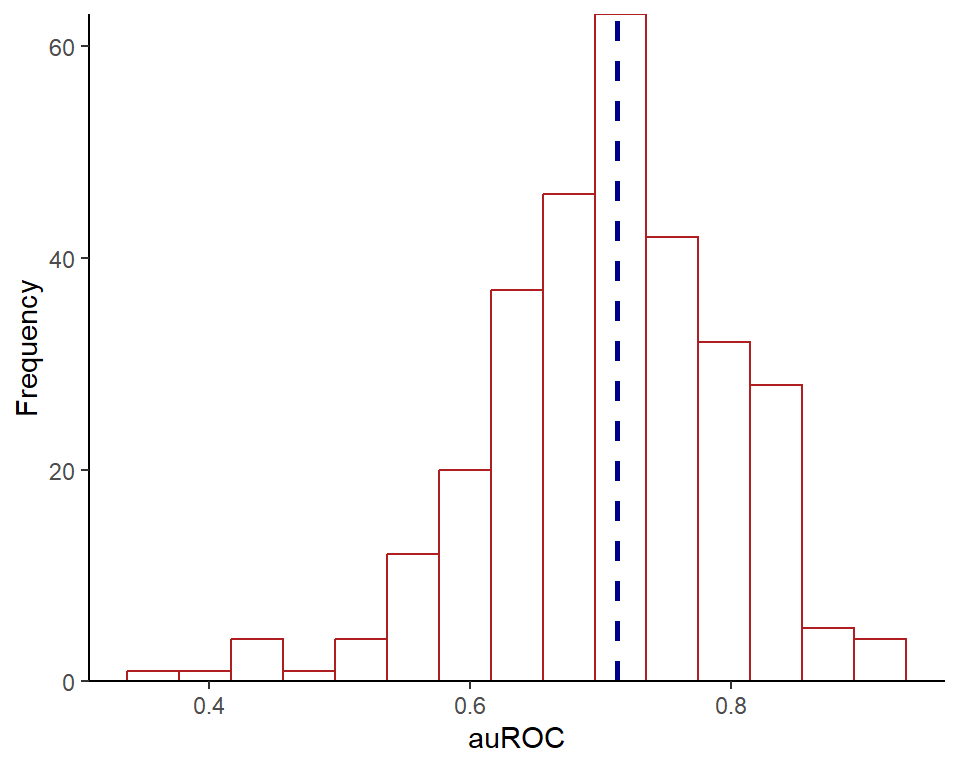
<figcaption>Figure 1: Area under the receiver operating characteristic (auROC) curves for each of 300 (10 x 30) cross validation splits. The dashed line represents the median auROC across all 300 splits.</figcaption>
</figure>

### Figure 2: Calibrated auROC plot

``` python
roc_data <- probs |> 
  roc_curve(prob_logi, truth = label)
  
plot_roc <- function(df, line_colors){
  df |> 
  ggplot(aes(x = 1 - specificity, y = sensitivity, color = model)) +
    geom_path(linewidth = 1.25) +
    geom_abline(lty = 3) +
    coord_fixed(xlim = c(0, 1), ylim = c(0, 1)) +
    labs(x = "False Positive Rate",
        y = "True Positive Rate") +
  scale_color_manual(values = line_colors)
}

roc_data |>
  mutate(sensitivity = round(sensitivity, 4),
         specificity = round(specificity, 4)) |>
  group_by(sensitivity, specificity) |> 
  summarise(.threshold = mean(.threshold)) |> 
  ggplot(aes(x = 1 - specificity, y = sensitivity, color = .threshold)) +
  #ggplot(aes(x = specificity, y = sensitivity, color = .threshold)) +
  geom_path(linewidth = 1) +
  geom_abline(lty = 3) +
  coord_fixed(xlim = c(0, 1), ylim = c(0, 1)) +
  labs(x = "False Positive Rate",
       y = "True Positive Rate") +
  scale_x_continuous(breaks = seq(0,1,.25),
    labels = sprintf("%.2f", seq(0,1,.25))) + # to flip axis
  scale_color_gradient(low="blue", high = "red", name = "Threshold") +
  theme(axis.text = element_text(size = rel(1.50)), 
        axis.title = element_text(size = rel(1.75)))
```

    `summarise()` has grouped output by 'sensitivity'. You can override using the
    `.groups` argument.

<figure id="fig-auroc-plot">
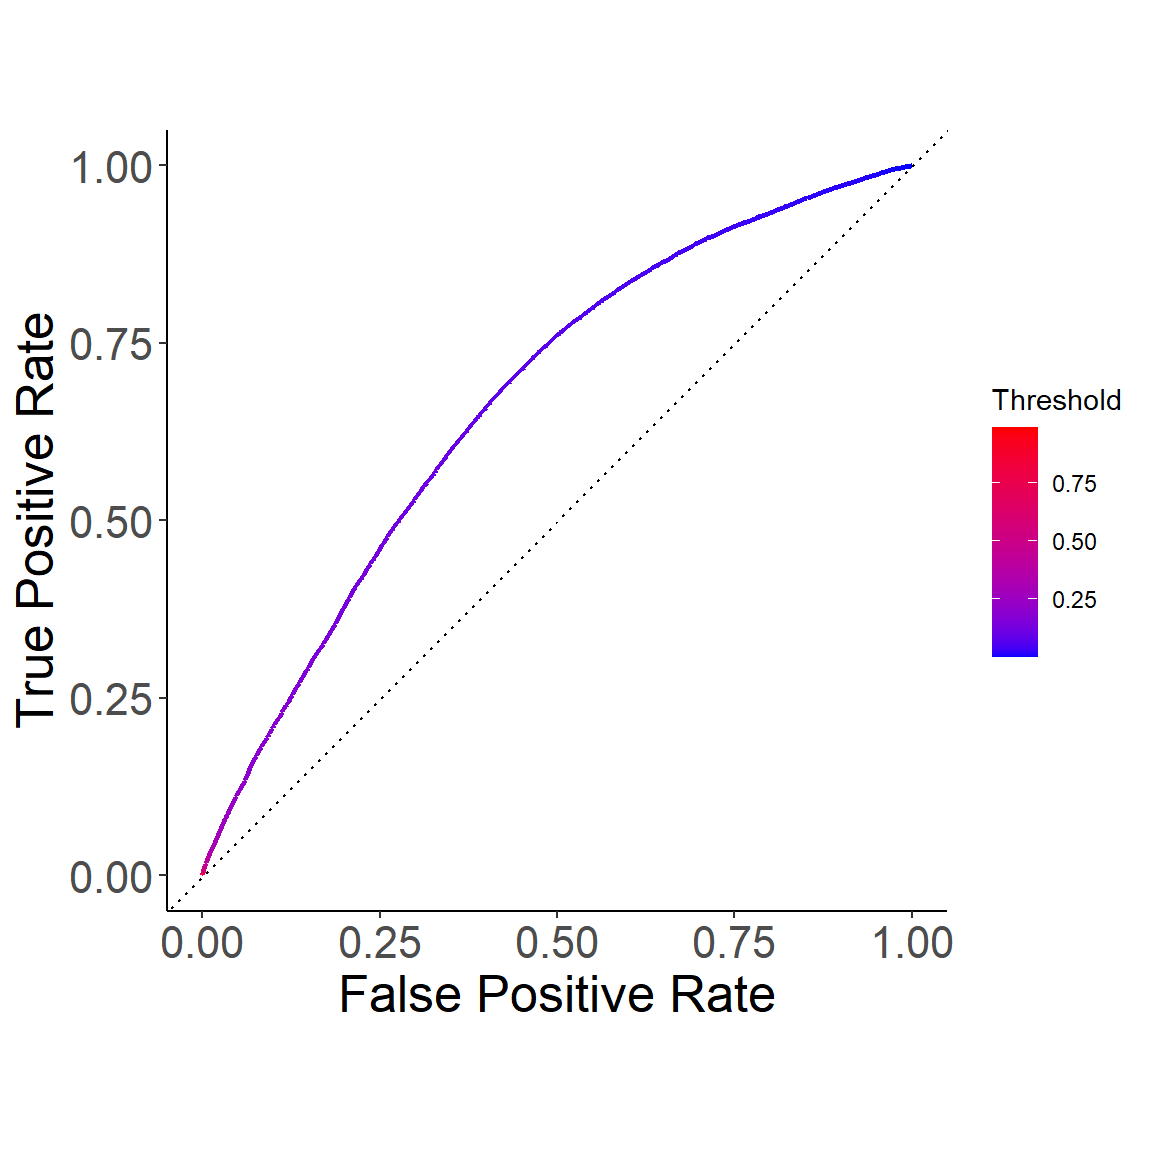
<figcaption>Figure 2: Area under the receiver operating characteristic (auROC) curve for overall validation set performance across all possible classification thresholds.</figcaption>
</figure>

### Figure 3: auROC posterior probability distribution

``` python
pp_tidy <- pp |> 
  tidy(seed = 123)

q <- c(0.025, 0.5, 0.975)

ci_day <- pp_tidy |> 
  summarize(median = quantile(posterior, probs = q[2]),
            lower = quantile(posterior, probs = q[1]), 
            upper = quantile(posterior, probs = q[3])) |> 
  mutate(y = 30)

pp_tidy |> 
  ggplot(aes(x = posterior)) + 
  geom_density(color = c("#af1f21"), fill = "white", alpha = 1, lwd = .8) +
  #geom_segment(mapping = aes(y = y, yend = y, x = lower, xend = upper), color = c("#af1f21"),
                #data = ci_day, lwd = 1) +
  geom_errorbar(aes(y = ci_day$y, xmin = ci_day$lower, xmax = ci_day$upper), color = c("darkblue"), lwd = 1) +
  geom_vline(xintercept = ci_day$median, color = c("darkblue"), lwd = 1, linetype="dashed") +
  geom_vline(xintercept = .5, color = "darkblue", lwd = 1, linetype="dotted") +
  scale_x_continuous(limits=c(0.49,.76)) +
  scale_y_continuous(expand = c(0,0)) +
  ylab("Posterior Probability Density") +
  xlab("Area Under ROC Curve")
```

<figure id="fig-pp">
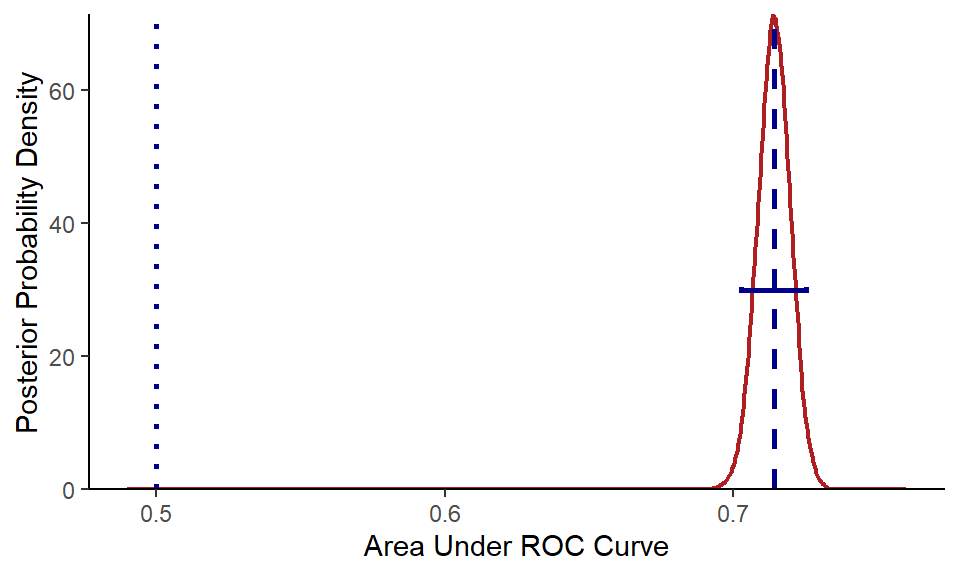
<figcaption>Figure 3: Posterior probability distribution of model performance with a 95% credible interval. The dashed line represents median auROC across the sampling distribution, while the dotted line represents chance performance (auROC = 0.50).</figcaption>
</figure>

### Figure 4: Calibration plot

``` python
cols <- c("prob_raw" = "#FF9898FF", "prob_logi" = "#A91E45FF")

probs |>
  mutate(.pred_lapse = .pred_Lapse) |>
  filter(method == "prob_raw" | method == "prob_logi") |> 
  cal_plot_breaks(truth = label, 
                  estimate = .pred_lapse,
                  .by = method) +
  scale_color_manual(values = cols,
                     aesthetics = c("color", "fill")) +
  ylab("Observed Lapse Rate") +
  xlab("Predicted Lapse Probability (Bin Midpoint)") +
  facet_grid(~factor(method, levels=c('prob_raw','prob_logi'),
                     labels = c("Raw (Uncalibrated) Probability",
                                "Logistic (Calibrated) Probability"))) +
  scale_y_continuous(breaks = seq(0,1, by = .1),
                     limits = seq(0,1)) +
  scale_x_continuous(breaks = seq(0,1, by = .1),
                     limits = seq(0,1)) +
  theme_classic() +
  theme(legend.position="none")
```

    Scale for y is already present.
    Adding another scale for y, which will replace the existing scale.
    Scale for x is already present.
    Adding another scale for x, which will replace the existing scale.

<figure id="fig-calibration">
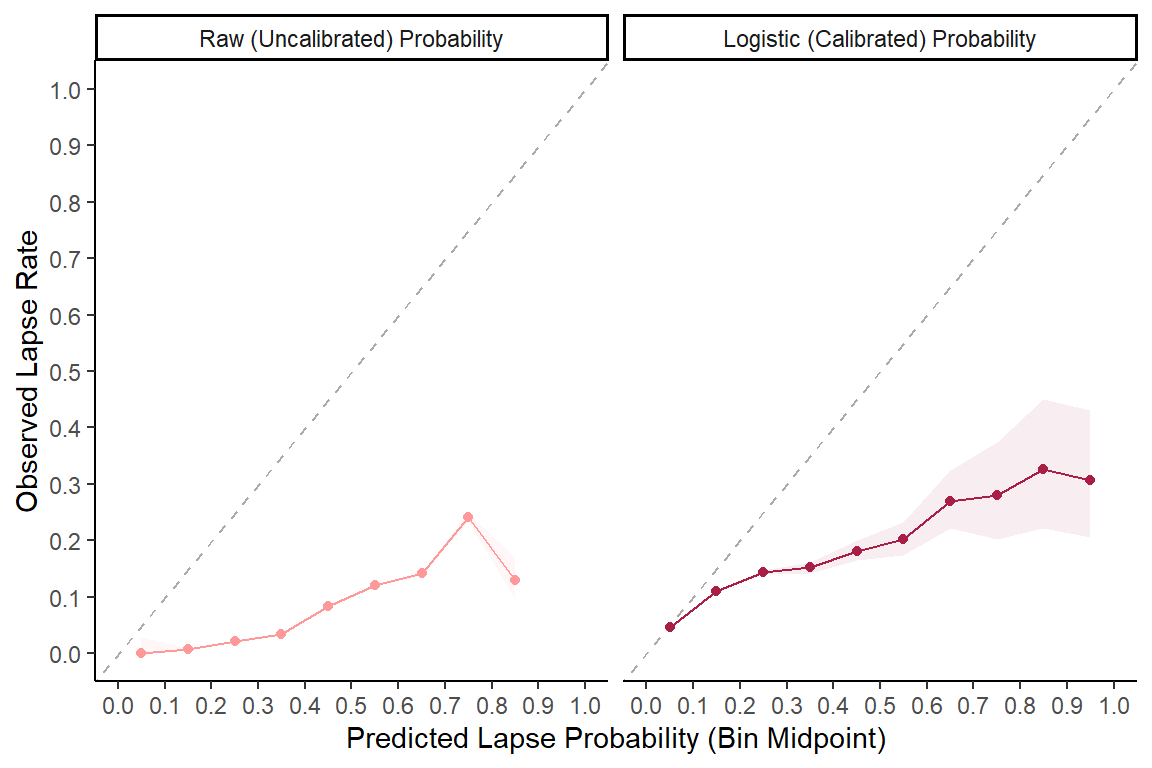
<figcaption>Figure 4: Comparison between raw (uncalibrated) and logistic (calibrated) probabilities. Predicted lapse probability represents the predicted probabilities derived from the model, whereas observed lapse rate reflects the true rate of lapses in the data. The dashed y = x line represents perfect performance, where predicted probabilities reflect true probabilities. Each point represents the midpoint of a given bin, which increase by 10% (i.e., 5% represents the midpoint from 0-10%).</figcaption>
</figure>

### Figure 5: Global Feature Importance

``` python
shaps_grp |>
  group_by(variable_grp) |>
  summarize(mean_value = (mean(abs(value)))) |> 
  mutate(group = reorder(variable_grp, mean_value)) |> #, sum)) |>
  #mutate(window = fct(window, levels = c("week", "day", "hour"))) |> 
  ggplot() +
  geom_bar(aes(x = group, y = mean_value), stat = "identity", fill = "#af1f21") +
  ylab("Mean |SHAP| value (in Log-Odds)") +
  xlab("") +
  coord_flip()
```

<figure id="fig-shaps-group">
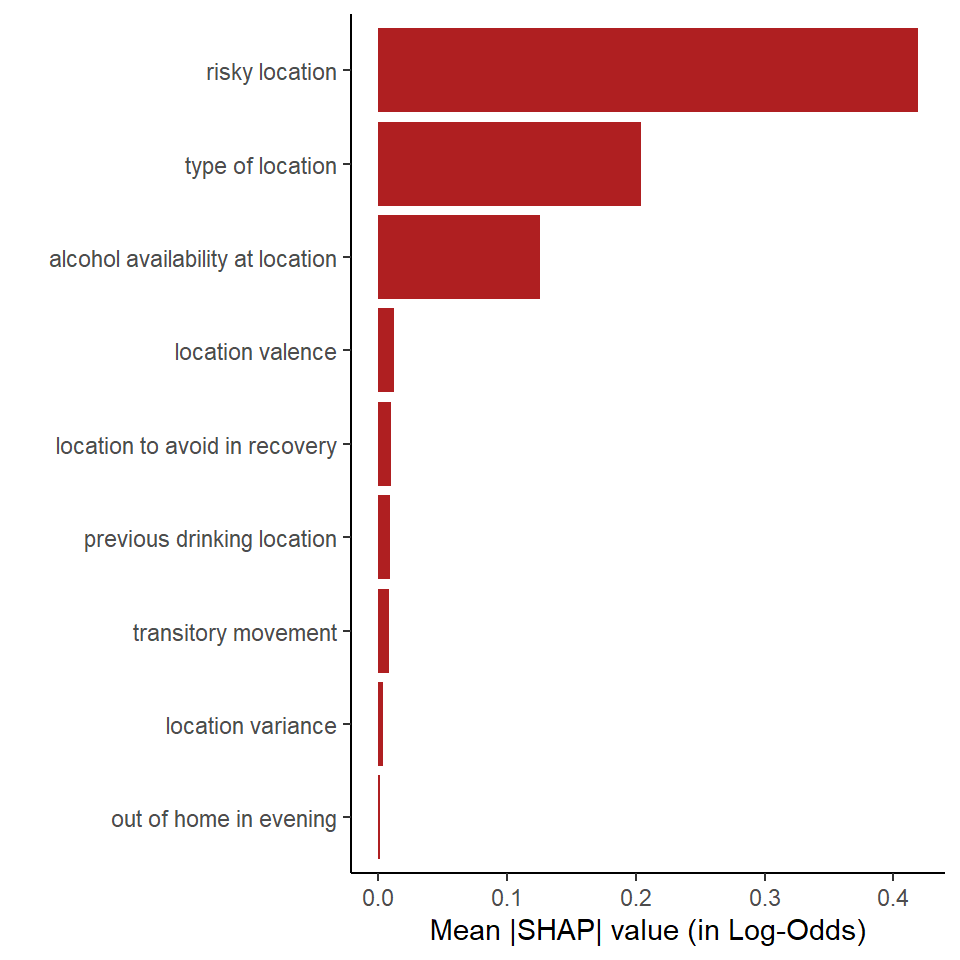
<figcaption>Figure 5: Grouped SHAP values displaying relative feature importance calculated using mean absolute values. Larger log-odds values indicate greater contribution to predictions in the model.</figcaption>
</figure>

### Figure 6: Posterior probability distribution 95% credible intervals by subgroup

``` python
cowplot::plot_grid(fig_race, fig_sex, fig_age, fig_income, align="v", scale = 0.95)
```

<figure id="fig-fairness-subgroups">
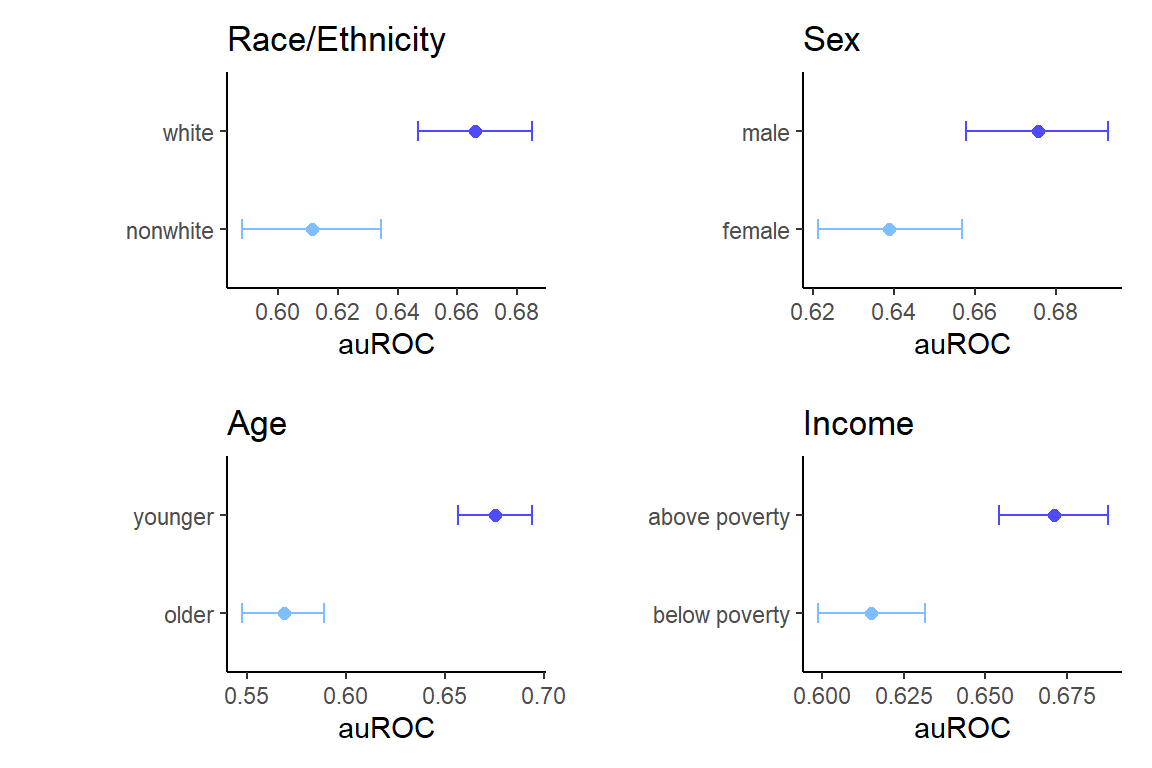
<figcaption>Figure 6: 95% credible intervals across posterior probability distributions by subgroup at differential levels of privilege.</figcaption>
</figure>